In [1]:
import numpy as np
import pandas as pd
from munch import Munch
from scipy import stats


# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))


import plotly.express as px
import matplotlib.pyplot as plt

import pchem as pc

## Standard van't Hoff equilibrium analysis

From class, the key equation we use to analyze chemical equilibria is

$$
\Delta_\text{r}G = \Delta_\text{r}H^\circ - T(\Delta_\text{r}S^\circ + R \ln{Q})
$$

At equilibrium, we have $\Delta_\text{r}G =0$ and $Q = K$. Over a small temperature range, we have


$$
\ln{K(T)}  \approx -\frac{\Delta_\text{r}H^{\circ}}{R} \frac{1}{T} + \frac{\Delta_\text{r}S^\circ}{R} 
$$

Example: Using absorbance $A = \varepsilon \ell c$, we can say the $\text{slope} = \varepsilon \ell$, so molar absorptivity $\varepsilon = \frac{\text{slope}}{\ell}$. We need to divide both the slope and its uncertainty by $\ell = 2.5$ cm in this example.

Here's an example of a standard analysis for absorbance data...

In [2]:
x = np.array([1, 2, 3])
y = np.array([2, 4, 6.01])
    
results = regression(x, y)
results.slope

NameError: name 'regression' is not defined

In [ ]:
results.slope_95

In [ ]:
def regression(x, y, alternative='two-sided'):
    """Perform a linear regression (using scipy.stats.linregress), 
    compute proper confidence intervals for the slope (slope_95) and intercept (intercept_95),
    R² (Rsquared), and compute the residuals (residuals).
    
    Everything is output to a single results object, 
    which can be accessed via dictionary or `.` syntax.
    
    Example:
    >>> x = np.array([1, 2, 3])
    >>> y = np.array([2, 4, 6.01])
    >>> r = regression(x, y)
    >>> r.slope
    2.005
    >>> r.slope_95
    0.037
    
    Outputs: an object containing 
        slope
        intercept
        slope_95 
            95% confidence interval for the slope
        intercept_95
            95% confidence interval for the intercept
        Rsquared
            R²
        rvalue
            Correlation coefficient
        stderr
        intercept_stderr
        pvalue
        predict
            function to predict the y value at a given x
        x
        y_predicted
        y
        residual
    
    """
    # Linear regression
    r = stats.linregress(x, y)
    results = Munch(slope=r.slope, intercept=r.intercept,
                    stderr=r.stderr, intercept_stderr=r.intercept_stderr,
                    rvalue=r.rvalue, pvalue=r.pvalue, Rsquared=r.rvalue**2)
    # T-value to convert from standard error to confidence interval 
    # (0.05 means 1 - 0.05 = 95% interval)
    ts = tinv(0.05, len(x) - 2) # Degrees of freedom
    
    # Uncertainties...
    results.slope_95 = results.stderr * ts
    results.intercept_95 = results.intercept_stderr * ts

    results.predict = lambda x: x * results.slope + results.intercept
    results.y_predicted = results.predict(x)
    results.x = x
    results.y = y
    results.residual = results.y - results.y_predicted
    
    return results

In [ ]:
## Key function: stats.linregress
## Example for determining molar absorbtivity and uncertainties with a 2.5 cm path length cuvette

# Example input data
concentrations = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Absorbances = np.array([0.23, 0.45, 0.68, 0.94, 1.15])

def absorbance_analysis(concs, As, path_length=1):
    
    # r short for results
    r = regression(concs, As)

    # epsilon uncertainty
    r.molar_abs = r.slope / path_length
    r.molar_abs_err =  r.slope_95 / path_length
    
    # Save the path length if needed...
    r.path_length = path_length
    
    # Write out a dataframe in case we want it later...
    r.df = pd.DataFrame({'conc_M': concs, "A": As, 'A_predicted': r.y_predicted, 'residual': r.residual})
    
    # Print everything nicely...
    # Print results...
    print(f"R² = {r.Rsquared:.4f}")
    print("Parameters with 95% uncertainty:")
    # Printing with 4 digits of precision (automatically choosing scientific notation when appropriate)
    # - you may want to increase / decrease as needed...
    print(f"Molar absorptivity ε = {r.molar_abs:.4g} ± {r.molar_abs_err:.4g} cm⁻¹ M⁻¹ ")
    print(f"Intercept: {r.intercept:4g} ± {r.intercept_95:.4g}")
    
    
    return r



In [ ]:
#r1 short for result 1...
r1 = absorbance_analysis(concentrations, Absorbances, path_length=2.5)

# Plots showing the results

In [ ]:
plt.plot(r1.x, r1.y, 'o')
plt.plot(r1.x, r1.y_predicted)
plt.xlabel("Concentration (M)")
plt.ylabel("Absorbance $A$")

In [ ]:
plt.plot(r1.x, r1.residual, 'o')
plt.xlabel("Concentration (M)")
plt.ylabel("Residual $A - A_\\mathrm{pred}$")

# Standard equilibrium analysis

Use the template below to do a standard equilibrium analysis for the reaction data below:

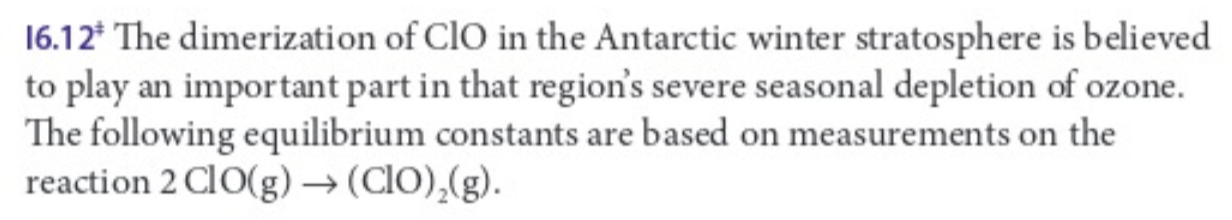

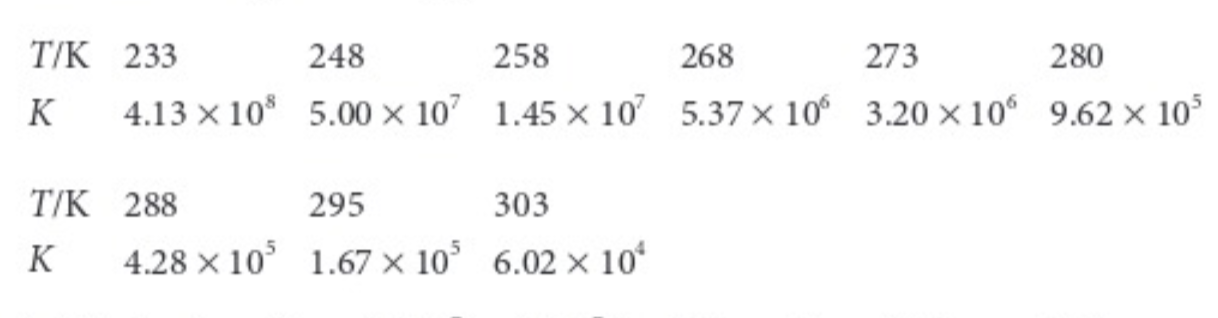

In [ ]:
T_sample = np.array([233, 248, 258, 268, 273, 280, 288, 295, 303])
K_sample = np.array([4.13e8, 5e7, 1.45e7, 5.37e6, 3.2e6, 9.62e5, 4.28e5, 1.67e5, 6.02e4])

In [ ]:
def equilibrium_analysis(temps, Ks):
    """Takes an array of temperatures temps and equilibrium constants Ks,
    returning the estimated enthalpy and entropy of reaction."""
    temps = np.array(temps) # Convert to an array
    Ks = np.array(Ks) # Convert to an array
    
    # Define the x, y values (1/T, ln(K))
    
    
    # Perform regression
    
   
    # Calculate delta_H, delta_S, (and their uncertainties), and
    # the average temperature T_avg (np.mean) from the data 
    # Save everything to the results object
    
    
    # Add a dataframe if desired...
    
    # Nice printout of all the parameters / results....
    
    # Return results object
    return None